In [1]:
# Notes - including the full set of 640 controls didn't do much - however in this case, I also forgot to include the constraint that the 1RBCs are still 0RBCs.
# Removing these solutions *did* make the optimal control worse though. (I'm skipping many below) 
# Maybe I should include sparsity and normalization to get qualitatively different results

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import dill
import numpy as np
import random
mypath = 'controls_106'
_file = 'pickled_controls106.pkl'
filename = os.path.join(mypath, _file)


In [4]:
import numpy as np
import dill
pca = dill.load(open(filename, 'rb'))
num_steps = 150
dt = 5/2 * np.pi/num_steps
pca.dt = dt
pca.num_steps = num_steps

In [5]:
# Keep every_ith control. Increase this if you want to decrease the number of controls being considered.
every_ith = 64

def bangbang(index, x, d1, d2, d3, d4, num_steps):
    if x:
        xory = 0
    else:
        xory = 1
    dt = pca.dt
    control_hamiltonians = pca.control_hamiltonians
    controls = np.zeros((num_steps, int(len(pca.control_hamiltonians))))
    choices = (np.random.rand(100) - .5)/20 + 1
    controls[index, xory] = (1 / dt * np.pi / 2) * d1 * random.choice(choices)
    controls[-(index+1), xory] = 1 / dt * np.pi / 2 * d2 * random.choice(choices)
    controls[index, 2+xory] = 1 / dt * np.pi / 2 * d3 * random.choice(choices)
    controls[-(index+1), 2+xory] = 1 / dt * np.pi / 2 * d4 * random.choice(choices)
    return controls
random.seed(100)
np.random.seed(100)
controls = []
import itertools
for directions in list(itertools.product([-1, 1], repeat=4)):
    for x in (True, False):
        for i in range(int(pca.controlset[0].shape[0]/2)):
            if i % every_ith != 0:
                continue
            controls.append(bangbang(i, x, *directions, num_steps))
# Add on the do-nothing control
pca.controlset = []
pca.controlset += controls
pca.controlset += [np.random.rand(*controls[0].shape)]
pca.num_controls = len(pca.controlset)
pca.weights = None

In [16]:
from convex import all_derivs
derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)
derivs[1] = [np.delete(d, 2, 0) for d in derivs[1]]

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

In [17]:
import scipy
[np.trace(scipy.linalg.expm(-1.j*pca.dt*d.reshape(4,4)))/4 for d in derivs[0]]

[(0.9999948161052425+1.0164395367051604e-19j),
 (0.9999983730315387+1.7618285302889447e-19j),
 (0.9999979067170703+6.776263578034403e-20j),
 (0.999996797083757+6.776263578034403e-20j),
 (0.986895306850934+2.7755575615628914e-17j),
 (0.9870596525468434+6.938893903907228e-18j),
 (0.986879023109342+4.119968255444917e-18j),
 (0.9867719016337535-3.469446951953614e-17j),
 (0.9867587560959395+9.540979117872439e-18j),
 (0.9868821372763498-8.673617379884035e-18j),
 (0.986954795191566+2.6020852139652106e-18j),
 (0.9869311772442418-1.734723475976807e-18j),
 (0.9999978625956163-6.776263578034403e-20j),
 (0.9999996128179895-1.6263032587282567e-19j),
 (0.9999964646179278-2.168404344971009e-19j),
 (0.9999952045547953-1.3552527156068805e-19j),
 (0.9868196821491089-2.2293907171733185e-18j),
 (0.9868926960048864-6.938893903907228e-18j),
 (0.9868489406241512+5.204170427930421e-18j),
 (0.9866782817257751+6.071532165918825e-18j),
 (0.9999961753375202+1.0842021724855044e-19j),
 (0.9999998187734643+1.0842021

In [18]:
import dill
_file = open('derivs', 'wb')
dill.dump(derivs, _file)

In [19]:
import matplotlib.pyplot as plt
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [20]:
from pauli_channel_approximation import PCA

In [21]:
from convex import optimal_weights
pca.weights_0 = optimal_weights(derivs[:1], l=0)

Done with convex problem 0 out of 65
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 201             
  Cones                  : 2               
  Scalar variables       : 103             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 13              
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 20

In [22]:
pca.weights_0

matrix([[ 8.16289478e-08],
        [ 6.24676167e-08],
        [ 5.24456405e-08],
        [ 2.48175977e-07],
        [ 2.84656880e-04],
        [-4.20640074e-09],
        [-3.21679377e-09],
        [ 1.96740488e-08],
        [-2.96999798e-09],
        [-3.25320350e-09],
        [-4.29025560e-09],
        [-4.21658543e-09],
        [ 4.49607400e-07],
        [ 7.13721829e-01],
        [ 1.65337180e-07],
        [ 1.37893247e-07],
        [-1.93895860e-10],
        [-3.10143229e-09],
        [-4.34087527e-09],
        [-4.21579228e-09],
        [ 4.43592218e-08],
        [ 2.27478765e-01],
        [ 9.21376395e-08],
        [ 2.09428912e-07],
        [ 9.49214781e-07],
        [ 5.45356066e-02],
        [ 5.97877616e-08],
        [ 4.88914596e-08],
        [ 3.91443968e-04],
        [ 4.24611051e-08],
        [-3.58378966e-09],
        [-3.54406951e-09],
        [-2.89293127e-09],
        [-4.21623877e-09],
        [-3.95579194e-09],
        [ 1.33376886e-08],
        [ 9.47390971e-08],
 

In [23]:
num_weights = len(pca.weights_0)

SUPPORT:0.9999999976587373
NUM CONTROLS: 65


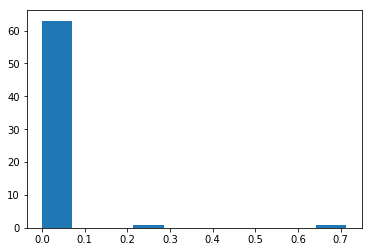

In [24]:
idx0, supp = hist_and_support(pca.weights_0, num_weights)

In [25]:
from convex import optimal_weights
pca.weights = optimal_weights(derivs, l=0)
# pca.weights[0] = .5
# pca.weights[1] = .5

Done with convex problem 0 out of 65
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 297             
  Cones                  : 2               
  Scalar variables       : 199             
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 2
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type      

SUPPORT:0.9999999983859789
NUM CONTROLS: 65


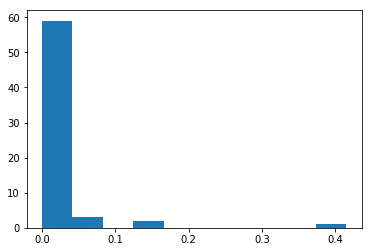

In [26]:
idx1, supp = hist_and_support(pca.weights, num_weights)

In [27]:
pca0 = dill.load(open(filename, 'rb'))
pca0.controlset = controls
subweights =  np.array(pca.weights_0)[idx0]
pca.controlset += controls
pca0.controlset += [np.zeros(controls[0].shape)]
pca0.weights = None


pca0.num_controls = len(pca0.controlset)
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

In [28]:
pca1 = dill.load(open(filename, 'rb'))
pca1.controlset = controls
subweights = np.array(pca.weights)[idx1]
pca.controlset += controls
pca.controlset += [np.zeros(controls[0].shape)]
pca.weights = None



pca1.num_controls = len(pca1.controlset)
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)


In [29]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

ZEROTH ORDER: 1.2888236782655097e-14


In [30]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

SUM: [[-3.94611644e-15-1.04079536e-15j]]


In [31]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

FIRST ORDER: 10.23099660228428


In [32]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

ZEROTH ORDER: 3.068018647580945e-09


In [33]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

SUM: [[3.48733615e-09+9.32974915e-16j]]


In [34]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

FIRST ORDER: 1.25701361066016


In [35]:
pca0.dt = dt
pca1.dt = dt
pca0.num_steps = num_steps
pca1.num_steps = num_steps
pca0.num_controls = len(pca0.controlset)
pca1.num_controls = len(pca1.controlset)

In [36]:
_file = 'pickled_controls106.pkl'
# Save the weighted controls
import dill
dill.dump(pca0, open('0_' + _file, 'wb'))

import dill
dill.dump(pca1, open('1_' + _file, 'wb'))

In [37]:
# Save the weighted controls
import dill
import os
import numpy as np


pca0 = dill.load(open('0_' + _file, 'rb'))
pca1 = dill.load(open('1_' + _file, 'rb'))

In [38]:
from pauli_channel_approximation import control_unitaries, error_unitary, off_diagonal_projection, adjoint
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce
import numpy as np

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):
    return np.matrix(jamiolkowski(superoperator(unitary)))

def diamond_distance(sopa, sopb):
#     unitary_a = np.matrix(unitary_a)
#     unitary_b = np.matrix(unitary_b)
#     arg = (choi_form(unitary_a) - choi_form(unitary_b))/2
#     rtn = diamond_norm(arg)
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for i, controls in enumerate(controlset):
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                if cnum == -1:
                    ambient_hamiltonian[cnum] *= 1 + float(value)
                else:
                    ambient_hamiltonian[cnum] *= float(value)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        print("Control {}".format(i))
        if i == 0:
            d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

def generate_indices(num_points, order_desired):
    num_indices = len(order_desired)
    tuples = product(range(num_points), repeat=num_indices)
    indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] 
                    for i in range(num_indices)]) for t in tuples]
    return indices

In [39]:
import dill
all_results = []
base = np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), 1)
controls = np.concatenate([np.sort(-base),np.array([0]), base]) * 100
combinations0 = [[det, 0, 0, 0, 0, 0, 0] for det in controls]
combinations1 = [[0, det, 0, 0, 0, 0, 0] for det in controls]
combinations2 = [[0, 0, det, 0, 0, 0, 0] for det in controls]
combinations3 = [[0, 0, 0, det, det, 0, 0] for det in controls]
combinations4 = [[0, 0, 0, 0, 0, det, det] for det in controls]

for j, pca in enumerate((pca0, pca1)):
    d_norms00 = []
    for i in range(len(combinations0)):
        combo = combinations0[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms00.append(compute_diamond_norm(lst))
        dill.dump(d_norms00, open('d_norms00_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms01 = []
    for i in range(len(combinations1)):
        combo = combinations1[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms01.append(compute_diamond_norm(lst))
        dill.dump(d_norms01, open('d_norms01_{}_{}'.format(i, j), 'wb'))
# for j, pca in enumerate((pca0, pca1)):
#     d_norms02 = []
#     for i in range(len(combinations2)):
#         combo = combinations2[i]
#         lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
#                 pca.control_hamiltonians, pca.target_operator, pca.probs]
#         d_norms02.append(compute_diamond_norm(lst))
#         dill.dump(d_norms02, open('d_norms02_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms03 = []
    for i in range(len(combinations3)):
        combo = combinations3[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms03.append(compute_diamond_norm(lst))
        dill.dump(d_norms03, open('d_norms03_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms04 = []
    for i in range(len(combinations4)):
        combo = combinations4[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms04.append(compute_diamond_norm(lst))
        dill.dump(d_norms04, open('d_norms04_{}_{}'.format(i, j), 'wb'))
        
#     all_results.extend([d_norms00, d_norms01, d_norms02, d_norms03, d_norms04])
# dill.dump(all_results, open('all_results', 'wb'))

DOING COMBO [-0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
DOING COMBO [0.0, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Contr

Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
DOING COMBO [0, 0.0019952623149688785, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
DOING COMBO [0, 0, 0, -0.0019952623149688785, -0.0019952623149688785, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control

Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
DOING COMBO [0, 0, 0, 0, 0, 0.0, 0.0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Cont

In [ ]:
# import dill
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline
# which_parameter = 1


# d_norms00 = dill.load(open("d_norms0{}_2_0".format(which_parameter), 'rb'))
# d_norms10 = dill.load(open("d_norms0{}_2_1".format(which_parameter), 'rb'))
# controls = [-0.0019952623149688785, 0, 0.0019952623149688785]
# for a, b in ((d_norms00, d_norms10),):# (diamond_norms01, diamond_norms11)):
#     plt.figure(figsize=(10,6))
#     plt.semilogy(controls, np.array(a).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
#     plt.semilogy(controls, np.array(b).T[7], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");


#     plt.semilogy(controls, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
#     plt.semilogy(controls,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
#     plt.ylabel("Diamond Norm")
#     plt.xlabel("Detuning")
#     plt.legend()

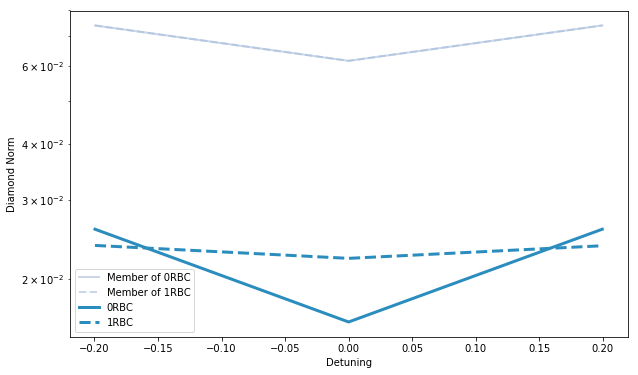

In [40]:
import dill
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
which_parameter = 0


d_norms00 = dill.load(open("d_norms0{}_2_0".format(which_parameter), 'rb'))
d_norms10 = dill.load(open("d_norms0{}_2_1".format(which_parameter), 'rb'))
controls = np.array([-0.0019952623149688785, 0, 0.0019952623149688785])*100
for a, b in ((d_norms00, d_norms10),):# (diamond_norms01, diamond_norms11)):
    plt.figure(figsize=(10,6))
    plt.semilogy(controls, np.array(a).T[0], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
    plt.semilogy(controls, np.array(b).T[0], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");


    plt.semilogy(controls, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
    plt.semilogy(controls,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
    plt.ylabel("Diamond Norm")
    plt.xlabel("Detuning")
    plt.legend()